# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/avi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
load_dotenv()

True

In [3]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [4]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
bit_news = newsapi.get_everything(
    q="Bitcoin",
    language="en")

In [6]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q="Ethereum",
    language="en")

In [7]:
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [8]:
bit_news_df = create_df(bit_news["articles"], "en")

In [9]:
eth_news_df = create_df(eth_news["articles"], "en")

In [10]:
# Sentiment scores dictionaries
text_sent = {
    "compound": [],
    "positive": [],
    "neutral": [],
    "negative": [],
}

# Get sentiment for the text and the title
for index, row in bit_news_df.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["compound"].append(text_sentiment["compound"])
        text_sent["positive"].append(text_sentiment["pos"])
        text_sent["neutral"].append(text_sentiment["neu"])
        text_sent["negative"].append(text_sentiment["neg"])
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
text_sentiment_df = pd.DataFrame(text_sent) 
text_sentiment_df = text_sentiment_df.join(bit_news_df['text'])
bit_news_df = text_sentiment_df

In [13]:
# Sentiment scores dictionaries
text_sent = {
    "compound": [],
    "positive": [],
    "neutral": [],
    "negative": [],
}

# Get sentiment for the text and the title
for index, row in eth_news_df.iterrows():
    try:
        
        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["compound"].append(text_sentiment["compound"])
        text_sent["positive"].append(text_sentiment["pos"])
        text_sent["neutral"].append(text_sentiment["neu"])
        text_sent["negative"].append(text_sentiment["neg"])
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

text_sentiment_df = pd.DataFrame(text_sent)
text_sentiment_df = text_sentiment_df.join(eth_news_df['text'])
eth_news_df = text_sentiment_df

In [12]:
bit_news_df.describe()

,compound,positive,neutral,negative
count,20.00000,20.000000,20.000000,20.000000
mean,0.04959,0.068500,0.880350,0.051100
std,0.41736,0.068593,0.064537,0.042733
min,-0.54230,0.000000,0.772000,0.000000
25%,-0.27320,0.000000,0.831500,0.000000
50%,-0.02580,0.062000,0.892000,0.063000
75%,0.40070,0.085750,0.925750,0.078750
max,0.75060,0.197000,1.000000,0.143000


In [16]:
eth_news_df.describe()

,compound,positive,neutral,negative
count,20.000000,20.000000,20.00000,20.000000
mean,-0.005115,0.071000,0.86835,0.060600
std,0.477148,0.105454,0.11579,0.068598
min,-0.784500,0.000000,0.59400,0.000000
25%,-0.273200,0.000000,0.82475,0.000000
50%,-0.127900,0.023000,0.92100,0.059000
75%,0.303775,0.085000,0.93900,0.076250
max,0.932700,0.349000,1.00000,0.233000


### Questions:

Q: Which coin had the highest mean positive score?

A: Eth has the higher mean positive score: 0.071000 compared to bitcoins: 0.068500. 

Q: Which coin had the highest compound score?

A: Eth has the highest compound score at a max: 0.932700 compared to bitcoins: 0.75060.  

Q. Which coin had the highest positive score?

A: Eth has the highest positive score at a max: 0.349000 compared to bitcoins: 0.197000

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [23]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [37]:
#Becuase of change to using Ubuntu (must download)
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/avi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/avi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/avi/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [38]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
nltk.download('stopwords')
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addon = {'the'}

[nltk_data] Downloading package stopwords to /home/avi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    sw_addon = {'the'}
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    
    return tokens

In [40]:
# Create a new tokens column for Bitcoin
bit_news_df['tokens'] = bit_news_df['text'].apply(tokenizer)

In [42]:
bit_news_df.head()

,compound,positive,neutral,negative,text,tokens
0,-0.0516,0.056,0.882,0.061,A Bitcoin mining site powered by otherwise los...,"[bitcoin, mining, site, powered, otherwise, lo..."
1,-0.4404,0.000,0.919,0.081,Its set to open later this year\r\nIf you buy ...,"[set, open, later, yearif, buy, something, ver..."
2,0.4019,0.088,0.912,0.000,Wikipedia editors have voted in favor of dropp...,"[wikipedia, editor, voted, favor, dropping, cr..."
3,-0.3269,0.085,0.772,0.143,Warren Buffett has always been a bitcoin skept...,"[warren, buffett, ha, always, bitcoin, skeptic..."
4,-0.2732,0.000,0.943,0.057,"You might have heard of crypto Twitter, the co...","[might, heard, crypto, twitter, corner, social..."


In [43]:
# Create a new tokens column for Ethereum
eth_news_df['tokens'] = eth_news_df['text'].apply(tokenizer)

In [48]:
eth_news_df.head()

,compound,positive,neutral,negative,text,tokens
0,-0.7845,0.088,0.681,0.231,The US Department of Treasury says Lazarus is ...,"[us, department, treasury, say, lazarus, behin..."
1,0.1027,0.084,0.844,0.071,"18 with 15 posters participating, including st...","[poster, participating, including, story, auth..."
2,0.7351,0.188,0.812,0.000,"Opera launched its dedicated ""Crypto Browser"" ...","[opera, launched, dedicated, crypto, browser, ..."
3,-0.2263,0.046,0.879,0.075,A multi-billion dollar cryptocurrency company ...,"[multibillion, dollar, cryptocurrency, company..."
4,-0.2732,0.000,0.945,0.055,When Bored Ape Yacht Club creators Yuga Labs a...,"[bored, ape, yacht, club, creator, yuga, labs,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [49]:
from collections import Counter
from nltk import ngrams

In [110]:
# Generate the Bitcoin N-grams where N=2
btc_string = bit_news_df['text'].str.cat()
processed_1 = tokenizer(btc_string)
btc_bigrams = Counter(ngrams(processed_1, n=2))

In [111]:
# Generate the Ethereum N-grams where N=2
eth_string = eth_news_df['text'].str.cat()
processed_2 = tokenizer(eth_string)
eth_bigrams = Counter(ngrams(processed_2, n=2))

In [112]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [113]:
# Use token_count to get the top 10 words for Bitcoin
top_10_btc = token_count(btc_bigrams, N=10)
top_10_btc

[(('reuters', 'bitcoin'), 3),
 (('cash', 'app'), 3),
 (('million', 'usd'), 2),
 (('charsapril', 'reuters'), 2),
 (('app', 'user'), 2),
 (('previous', 'closebitcoin'), 2),
 (('closebitcoin', 'world'), 2),
 (('world', 'biggest'), 2),
 (('biggest', 'bestknown'), 2),
 (('bestknown', 'cryptocurrency'), 2)]

In [114]:
# Use token_count to get the top 10 words for Ethereum
top_10_eth = token_count(eth_bigrams, N=10)
top_10_eth

[(('charsapril', 'reuters'), 3),
 (('yacht', 'club'), 2),
 (('ha', 'promised'), 2),
 (('reuters', 'bitcoin'), 2),
 (('previous', 'closebitcoin'), 2),
 (('closebitcoin', 'world'), 2),
 (('world', 'biggest'), 2),
 (('biggest', 'bestknown'), 2),
 (('bestknown', 'cryptocurrency'), 2),
 (('cryptocurrency', 'year'), 2)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [116]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

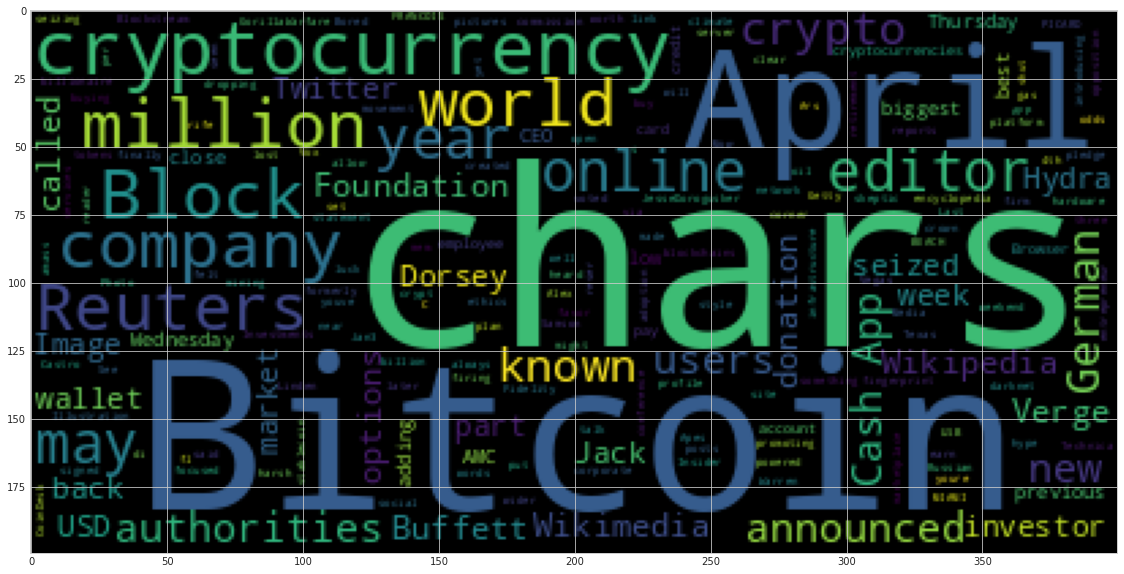

In [120]:
# Generate the Bitcoin word cloud
wordcloud_btc = WordCloud().generate(btc_string)
plt.imshow(wordcloud_btc)

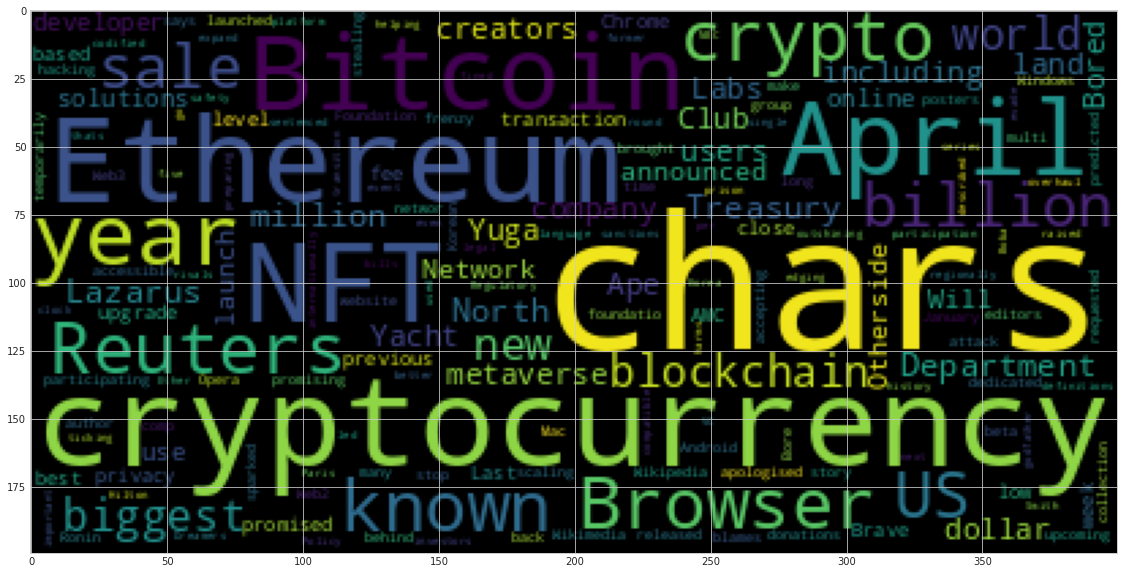

In [121]:
# Generate the Ethereum word cloud
wordcloud_eth = WordCloud().generate(eth_string)
plt.imshow(wordcloud_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [122]:
import spacy
from spacy import displacy

In [123]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

     |████████████████████████████████| 12.8 MB 1.8 MB/s eta 0:00:01    |██████████████████▉             | 7.5 MB 1.8 MB/s eta 0:00:03
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [124]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [126]:
# Concatenate all of the Bitcoin text together
btc_string

'A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r\n\n \n\n Of all the corporate climate hype fl… [+6544 chars]Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\nBlock and Blockstream, a … [+1336 chars]Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars]Warren Buffett has always been a bitcoin skeptic. But the billionaire investor had his most harsh words yet for the cryptocurrency over the weekend. Buffett made it clear that his opposition to crypt… [+2297 chars]You might have heard of crypto Twitter, the corner of the social network where accounts have Bored Apes as profile pictures, posts 

In [131]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_string)

# Add a title to the document
btc_doc.user_data['title'] = 'Bitcoin NER Visualization'

In [132]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [142]:
# List all Entities
btc_entities = [ent.text for ent in btc_doc.ents]
btc_entities

['Linden',
 'Texas',
 'April 4th, 2022',
 'Photo',
 'FRANCOIS PICARD/AFP',
 'Getty Images',
 'later this year',
 'Verge',
 'Vox',
 'Alex Castro',
 'Blockstream',
 "the Wikimedia Foundation's",
 'Ars Technica',
 'GorillaWarfare',
 'Buffett',
 'the weekend',
 'Twitter',
 'Twitter',
 'Jack Dorsey’s',
 '$25.2 million',
 'USD',
 'Bitcoin',
 'German',
 'Russian',
 'Hydra',
 '23 million',
 'Last week',
 'Fidelity Investments',
 'chars]April 12',
 'Reuters',
 '$10 billion',
 'chars]MIAMI BEACH',
 'April 7',
 'Reuters',
 'Samson Mow',
 'Thursday',
 'Jan3',
 'Block',
 'Jack Dorsey',
 'three',
 'Thursday',
 'CoinDesk',
 'Cash App',
 '15',
 'More than 200',
 'Wikipedia',
 'the Wikimedia Foundation',
 '+4016 chars]April 26',
 'Reuters',
 '5.1%',
 '38,391.36',
 'Tuesday',
 '2,229.82',
 '16%',
 'year',
 '+339 chars]May 4',
 'Reuters',
 '5.7%',
 '39,862.84',
 'Wednesday',
 '2,102.94',
 '20.9%',
 'year',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'Crypto Browser',
 'January',
 'Windows, Mac',
 'Androi

---

### Ethereum NER

In [143]:
# Concatenate all of the Ethereum text together
eth_string

'The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]18 with 15 posters participating, including story author\r\nMore than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations.\xa0The foundatio… [+4016 chars]Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The company released the browser for Windows, Mac and Android users … [+1563 chars]A multi-billion dollar cryptocurrency company has apologised to users after its sale of metaverse land sparked a frenzy that temporarily brought down the Ethereum cryptocurrency.\r\nYuga Labs, the comp… [+3475 chars]When Bored Ape Yacht Club creators Yuga Labs announced its Otherside NFT collection would launch on April 30, it was predicted by many

In [144]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_string)

# Add a title to the document
eth_doc.user_data['title'] = 'Ethereum NER Visualization'

In [145]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [146]:
# List all Entities
eth_entities = [ent.text for ent in eth_doc.ents]
eth_entities

['The US Department of Treasury',
 'The US Treasury Department',
 'North Korean',
 '$625 million',
 'Ronin',
 '15',
 'More than 200',
 'Wikipedia',
 'the Wikimedia Foundation',
 'Crypto Browser',
 'January',
 'Windows, Mac',
 'Android',
 'Ethereum',
 'Yuga Labs',
 'Yacht Club',
 'Yuga Labs',
 'Otherside NFT',
 'April 30',
 'NFT',
 'chars]April 5',
 'Reuters',
 'Boba Network',
 '$45 million',
 'Will Smith',
 'Dreamers VC',
 'Paris Hilton',
 'Ethereum',
 'more than five years',
 '100,000',
 'North Korea',
 'US',
 'NBC News',
 '26',
 'Reuters',
 'No.2',
 'second',
 'chars]The Brave Browser',
 'Chrome',
 'Brave',
 'AMC',
 'April 15',
 'AMC',
 'Adam Aron',
 'Last night',
 'Bloomberg',
 'nearly a third',
 'a billion dollars',
 'this week',
 'the Ukrainian Computer Emergency Response Team',
 'Slovakian',
 'Russia',
 'Ethereum',
 'Merge',
 'a few months after June',
 'first',
 'a year and a half ago',
 'The Order Flow',
 'Dan Robinson',
 "Georgios Konstantopoulos'",
 'August 20',
 '26',
 'Reut

---